In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
from IPython.display import clear_output

In [106]:
# dataframe = pd.read_csv(r"C:\Use^rs\luiis\OneDrive\Escritorio\henry homework\modulo 6\Proyecto Integrador\Propuesta 2\ML_cars.csv")
df = pd.read_csv(r"C:\Courses\Henry\M6\Proyecto Integrador\Propuesta 2\ML_cars.csv", sep=",", parse_dates=["price"])
df

C:\Users\Eduardo V2\AppData\Local\Temp\ipykernel_17412\982911925.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r"C:\Courses\Henry\M6\Proyecto Integrador\Propuesta 2\ML_cars.csv", sep=",", parse_dates=["price"])


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [32]:
df[df.isnull().any(axis=1)]
 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [57]:
df[df.duplicated()]
#df[df['CarName']=='mazda 626']

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [59]:
frecuencia_valores = df['fuelsystem'].value_counts()
frecuencia_valores

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [ ]:
frecuencia_valores

In [ ]:
df['fuelsystem']

In [ ]:
df.shape

In [ ]:
df.sort_values(by='boreratio', ascending=True)

In [105]:
df.duplicated().sum()

0

In [ ]:
#Outliers
# Definir las columnas relevantes
columnas_relevantes = ["price", "enginesize", "horsepower", "citympg", "highwaympg"]
# Convertir las columnas a tipo numérico
df[columnas_relevantes] = df[columnas_relevantes].astype(float)
df_outlier = pd.DataFrame()
# Buscar outliers en las columnas relevantes
for columna in columnas_relevantes:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR 
    print(columna,Q1)
    df_outlier = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]


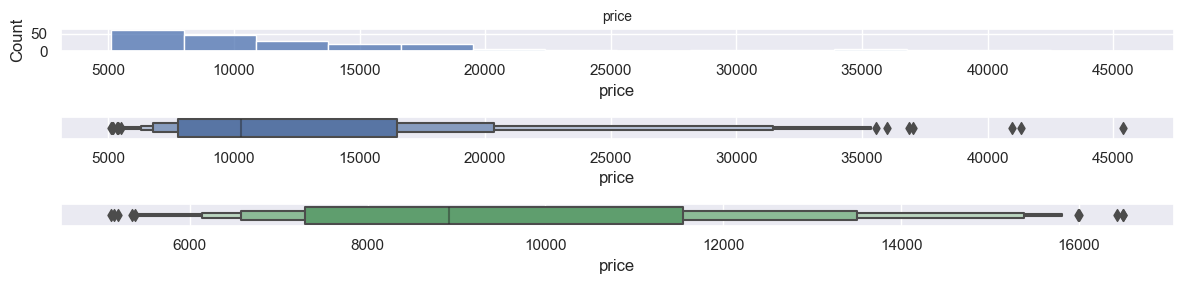

In [160]:
import matplotlib.pyplot as plt
import pandas as pd
# DETECCION DE OUTLIERS de precio : quantil, y graficos
fig, (ax1,ax2, ax3) = plt.subplots(3,1,figsize=(12,3))
max_limit = df['price'].quantile(.75) 
sns.histplot(x=df['price'],ax=ax1)
ax1.set_title('price',fontsize=10)
sns.boxenplot(x=df['price'],ax=ax2)
sns.boxenplot(x=df[df['price']<max_limit]['price'], color='g',ax=ax3)
fig.tight_layout()
# Conclusion, se pueden eliminar valores, encima de un quantil

In [162]:
# https://rstudio-pubs-static.s3.amazonaws.com/883596_d4c731e0d96d4a72a184571793fcff55.html
# DETECCION DE OUTLIERS : METODO Z, se neceita la media y la desviacion estandar
z_scores = np.abs((df['price'] - df['price'].mean()) / df['price'].std())

# Define a threshold for identifying outliers (e.g., z-score > 3), esto es una convencion, un limite o umbral
threshold = 3

# Identify outliers based on the threshold
outliers = df[z_scores > threshold]

# Print the outliers
outliers

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209.0,mpfi,3.62,3.39,8.0,182.0,5400,16.0,22.0,41315.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308.0,mpfi,3.80,3.35,8.0,184.0,4500,14.0,16.0,40960.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304.0,mpfi,3.80,3.35,8.0,184.0,4500,14.0,16.0,45400.0


<Axes: >

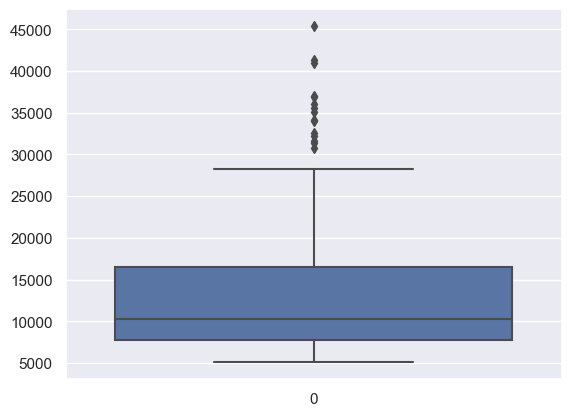

In [172]:
# https://rstudio-pubs-static.s3.amazonaws.com/883596_d4c731e0d96d4a72a184571793fcff55.html
# DETECCION DE OUTLIERS : METODO QUARTILES
Q1,Q3 = df['price'].quantile([0.25,0.75]) 
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers
sns.boxplot(df['price'])
# se detectan que 15 autos tienen un precio cerca a los extremos